In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.linear_model import LinearRegression

from simulated_annealer import SimulatedAnnealer

mpl.rcParams['figure.figsize'] = [6, 4]
mpl.rcParams['font.size'] = 12   
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['errorbar.capsize'] = 4
plt.style.use('ggplot')

In [13]:
def trivial_objective(params):
    return params['x']**2 + params['y']**2 + params['z']**2

param_grid = {
    'x': np.linspace(-1, 1, 50).tolist(),
    'y': np.linspace(-1, 1, 50).tolist(),
    'z': np.linspace(-1, 1, 50).tolist()
}

an = SimulatedAnnealer(
    param_grid, 
    initial_temp = 1, 
    cooling_halflife = 60, 
    max_iter = 500,
    seed = 1,
    max_neighbour_attempts = 500,
    var_n_param_changes = True,
    n_param_proposal_poi_lam = 0.3,
    var_jump_size = True,
    jump_size_poi_lam = 0.3
    )



In [14]:
history, best_state, best_energy = an.fit(trivial_objective, verbose = True)

Iteration 1   , T: 0.9885, P(acc) : 1.0000 E: 1.5406 Accepted: 1, Best Energy: 1.5406, Iter: 1.23e-04s
Location already visited, trying again. Attempt 1
Iteration 2   , T: 0.9772, P(acc) : 1.0000 E: 1.4140 Accepted: 1, Best Energy: 1.4140, Iter: 3.12e-05s
Iteration 3   , T: 0.9659, P(acc) : 0.9214 E: 1.4940 Accepted: 1, Best Energy: 1.4140, Iter: 1.53e-05s
Iteration 4   , T: 0.9548, P(acc) : 0.8924 E: 1.6039 Accepted: 1, Best Energy: 1.4140, Iter: 1.29e-05s
Iteration 5   , T: 0.9439, P(acc) : 0.9391 E: 1.6639 Accepted: 1, Best Energy: 1.4140, Iter: 1.14e-05s
Iteration 6   , T: 0.9330, P(acc) : 0.9722 E: 1.6905 Accepted: 1, Best Energy: 1.4140, Iter: 1.07e-05s
Iteration 7   , T: 0.9223, P(acc) : 1.0000 E: 1.5839 Accepted: 1, Best Energy: 1.4140, Iter: 1.76e-05s
Iteration 8   , T: 0.9117, P(acc) : 1.0000 E: 1.5606 Accepted: 1, Best Energy: 1.4140, Iter: 1.05e-05s
Iteration 9   , T: 0.9013, P(acc) : 1.0000 E: 1.5006 Accepted: 1, Best Energy: 1.4140, Iter: 1.03e-05s
Location already visite

In [15]:
history = history[history['accepted']].reset_index(drop=True)

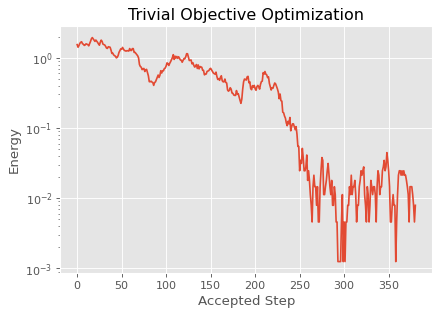

In [16]:
plt.figure(figsize=(6, 4))
plt.plot(history['energy'])
plt.title('Trivial Objective Optimization')
plt.xlabel('Accepted Step')
plt.ylabel('Energy')
plt.yscale('log')
plt.show()

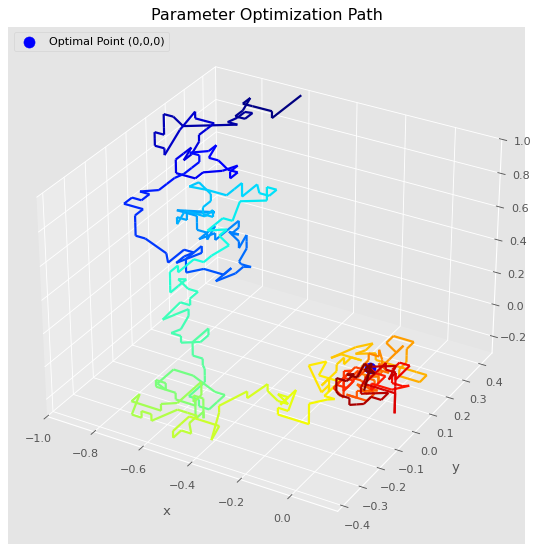

In [17]:
# plot 3d scatter of x, y, z with color gradient by index
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Parameter Optimization Path')

# Create a colormap
points = np.array([history['x'], history['y'], history['z']]).T
segments = np.concatenate([points[:-1, None], points[1:, None]], axis=1)

# Create a colored line collection
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

# Normalize colors based on index
N = len(history)
colors = plt.cm.jet(np.linspace(0, 1, N))

# Create line segments with colors
line_segments = []
for i in range(N-1):
    line_segments.append(np.array([[history['x'][i], history['y'][i], history['z'][i]],
                                  [history['x'][i+1], history['y'][i+1], history['z'][i+1]]]))

lc = Line3DCollection(line_segments, colors=colors[:-1], linewidth=2)
ax.add_collection(lc)


# Add the optimal point and set axis limits
ax.scatter(0, 0, 0, color='blue', s=100, label='Optimal Point (0,0,0)')
ax.set_xlim([history['x'].min(), history['x'].max()])
ax.set_ylim([history['y'].min(), history['y'].max()])
ax.set_zlim([history['z'].min(), history['z'].max()])

ax.set_xlabel('x', labelpad=10)
ax.set_ylabel('y', labelpad=10)
ax.set_zlabel('z', labelpad=10)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [18]:
# simple linear regression example
p = 3
X = np.random.randn(500, p)
weights = np.random.randn(p)/np.sqrt(p)
bias = np.random.randn(1)
noise = 0.1

y = X @ weights + bias + np.random.randn(500) * noise

def lr_objective(params, X_tr, y_tr):
    w = np.array([params[f'w{i}'] for i in range(p)])
    b = params['b']
    preds = X_tr @ w + b
    return np.mean((preds - y_tr) ** 2)

param_grid = {
    **{f'w{i}': np.linspace(-2, 2, 40).tolist() for i in range(p)},
    'b' : np.linspace(-2, 2, 40).tolist()
    }

an = SimulatedAnnealer(
    param_grid, 
    max_iter=500,
    cooling_halflife = 50,
    seed = 1,
    var_n_param_changes = True,
    var_jump_size = True,
    )

history, best_params, best_energy = an.fit(lr_objective, evaluation_args = {'X_tr': X, 'y_tr': y}, verbose = True)

Iteration 1   , T: 0.9862, P(acc) : 0.7501 E: 12.0587 Accepted: 1, Best Energy: 11.7712, Iter: 2.34e-04s
Iteration 2   , T: 0.9727, P(acc) : 0.5858 E: 12.5860 Accepted: 1, Best Energy: 11.7712, Iter: 4.55e-05s
Iteration 3   , T: 0.9593, P(acc) : 0.6934 E: 12.9422 Accepted: 1, Best Energy: 11.7712, Iter: 2.77e-05s
Iteration 4   , T: 0.9461, P(acc) : 1.0000 E: 11.9082 Accepted: 1, Best Energy: 11.7712, Iter: 2.36e-05s
Iteration 5   , T: 0.9330, P(acc) : 0.7325 E: 12.2027 Accepted: 1, Best Energy: 11.7712, Iter: 2.10e-05s
Iteration 6   , T: 0.9202, P(acc) : 0.7190 E: 12.5106 Accepted: 1, Best Energy: 11.7712, Iter: 2.05e-05s
Iteration 7   , T: 0.9075, P(acc) : 1.0000 E: 12.1546 Accepted: 1, Best Energy: 11.7712, Iter: 2.00e-05s
Iteration 8   , T: 0.8950, P(acc) : 0.6959 E: 12.4836 Accepted: 1, Best Energy: 11.7712, Iter: 1.98e-05s
Iteration 9   , T: 0.8827, P(acc) : 1.0000 E: 12.1481 Accepted: 1, Best Energy: 11.7712, Iter: 1.93e-05s
Location already visited, trying again. Attempt 1
Itera

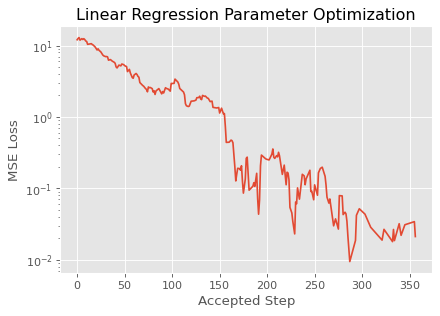

In [19]:
plt.figure(figsize=(6, 4))
plt.title('Linear Regression Parameter Optimization')
plt.xlabel('Accepted Step')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.plot(history[history['accepted']]['energy'])
plt.show()

In [20]:
print('Best params:   ', np.array([round(best_params[f'w{i}'], 8) for i in range(p)]), best_params['b'])
lr = LinearRegression().fit(X, y)
print('Sklearn params:', lr.coef_, lr.intercept_)
print('True Params:   ', weights, bias)

Best params:    [ 0.05128205 -0.56410256 -0.25641026] 1.1794871794871793
Sklearn params: [ 0.04263031 -0.57660397 -0.26401199] 1.1739744452967862
True Params:    [ 0.0460275  -0.57546798 -0.2661483 ] [1.16833817]


-11.74


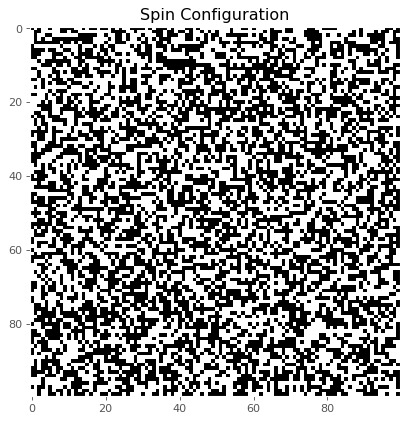

In [21]:
# TODO RF Ising model or something! Domains emergence on 2d-grid
from scipy import sparse
from numba import jit

rows = 100
cols = 100

N = rows * cols

row_indices = []
col_indices = []
values = []

# Create interactions more efficiently - only store non-zero elements
for i in range(N):
    # Calculate grid position
    row_i, col_i = i // cols, i % cols
    
    # Check neighbors: right, left, down, up
    neighbors = []
    if col_i < cols - 1:  # right neighbor
        neighbors.append(i + 1)
    if col_i > 0:  # left neighbor
        neighbors.append(i - 1)
    if row_i < rows - 1:  # down neighbor
        neighbors.append(i + cols)
    if row_i > 0:  # up neighbor
        neighbors.append(i - cols)
    
    # Add interactions for each neighbor
    for j in neighbors:
        row_indices.append(i)
        col_indices.append(j)
        values.append(1)  

# Create sparse matrix
J_ij = sparse.csr_matrix((values, (row_indices, col_indices)), shape=(N, N))
h_i = 0.1 * np.ones(N)

parameters = {
    f's{i}' : [-1, 1] for i in range(N)
    }

def hamiltonian(params):
    s = np.array([params[f's{i}'] for i in range(N)])
    interaction_energy = -0.5 * s.T @ J_ij @ s
    field_energy = -h_i @ s
    return 1000 * (interaction_energy + field_energy)/ (rows * cols)

def visualize_spins(params):
    plt.figure(figsize=(6, 6))
    s = np.array([params[f's{i}'] for i in range(N)]).reshape((rows, cols))
    plt.imshow(s, cmap='Greys', vmin=-1, vmax=1)
    #plt.colorbar(label='Spin State')
    plt.title('Spin Configuration')
    plt.grid(False)



print(hamiltonian({f's{i}': np.random.choice([-1, 1]) for i in range(N)}))
visualize_spins({f's{i}': np.random.choice([-1, 1]) for i in range(N)})

In [22]:
an = SimulatedAnnealer(
    parameters,
    initial_temp = 1,
    cooling_halflife = 2500,
    max_iter = 60000,
    seed = 1,
    max_neighbour_attempts = 1000,
    var_n_param_changes = True,
    n_param_proposal_poi_lam = 5,
    var_jump_size = False,
    jump_size_poi_lam = 1
    
    )

history, best_state, best_energy = an.fit(hamiltonian, verbose = False, history_jump = 10)

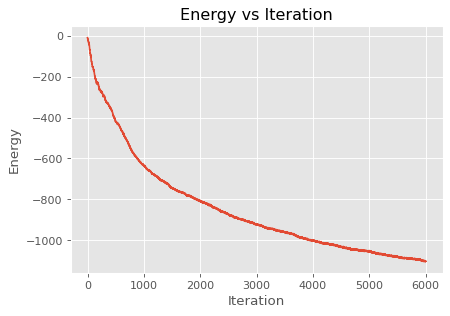

In [23]:
# energy plot
plt.figure(figsize = (6,4))
plt.plot(history['energy'])
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.title('Energy vs Iteration')
plt.show()

In [24]:
# makign a gif of the visualization of the spisn over time with the temperature displayed
import imageio
import os

if not os.path.exists('frames'):
    os.makedirs('frames')
    
filenames = []
T = an.initial_temp
for i, row in history[history.accepted].iterrows():
    T = row['temperature']

    visualize_spins(row.to_dict())
    plt.title(f'Spin Configuration at Step {i+1}, T={T:.3f}')
    plt.xticks([])
    plt.yticks([])
    filename = f'frames/spins_{i:03d}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.close()
    

with imageio.get_writer('spin_optimization.gif', mode='I', duration=0.05) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
# Remove frame files
for filename in set(filenames):
    os.remove(filename)

/tmp/ipykernel_174304/1768113525.py:25: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
